In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv("titanic.csv")

In [44]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [45]:
df.drop(['PassengerId','Name',	'SibSp','Parch','Ticket','Fare','Cabin'],axis=1,inplace=True)

In [46]:
df.head()

,Survived,Pclass,Sex,Age,Embarked
0,0,3,male,34.5,Q
1,1,3,female,47.0,S
2,0,2,male,62.0,Q
3,0,3,male,27.0,S
4,1,3,female,22.0,S


In [47]:
df.shape

(418, 5)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   Embarked  418 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 16.5+ KB


In [49]:
df.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age         86
Embarked     0
dtype: int64

In [50]:
x = df['Age'].mean()
x

30.272590361445783

In [51]:
round(x)

30

In [52]:
x = df['Age'].median()
x

27.0

In [53]:
df['Age'] = df['Age'].fillna(round(x))

In [54]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Embarked    0
dtype: int64

In [55]:
df.head()

,Survived,Pclass,Sex,Age,Embarked
0,0,3,male,34.5,Q
1,1,3,female,47.0,S
2,0,2,male,62.0,Q
3,0,3,male,27.0,S
4,1,3,female,22.0,S


In [56]:
final = pd.get_dummies(data =df,columns=['Sex', 'Embarked'],drop_first=True,dtype='int')

In [57]:
final.head()

,Survived,Pclass,Age,Sex_male,Embarked_Q,Embarked_S
0,0,3,34.5,1,1,0
1,1,3,47.0,0,0,1
2,0,2,62.0,1,1,0
3,0,3,27.0,1,0,1
4,1,3,22.0,0,0,1


In [58]:
x = final.drop("Survived", axis=1)

In [59]:
y = final.Survived

In [60]:
x.head()

,Pclass,Age,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,1,1,0
1,3,47.0,0,0,1
2,2,62.0,1,1,0
3,3,27.0,1,0,1
4,3,22.0,0,0,1


In [61]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [64]:
X_train.shape

(334, 5)

In [65]:
X_test.shape

(84, 5)

In [66]:
from sklearn.naive_bayes import BernoulliNB

In [67]:
model = BernoulliNB()

In [68]:
model.fit(X_train, y_train)

BernoulliNB()

In [69]:
model.score(X_test, y_test)

1.0

In [70]:
y_pred = model.predict(X_test)
y_pred 

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1], dtype=int64)

In [71]:
y_test[:5]

321    0
324    1
388    0
56     0
153    1
Name: Survived, dtype: int64

In [72]:
y_pred[:5]

array([0, 1, 0, 0, 1], dtype=int64)

In [73]:
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
gb.fit(X_train, y_train)
gb.score(X_test, y_test)

1.0

In [74]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
mnb.score(X_test, y_test)

0.8690476190476191

In [75]:
from sklearn.metrics import confusion_matrix

In [76]:
cm = confusion_matrix(y_test, y_pred)

In [77]:
import seaborn as sns

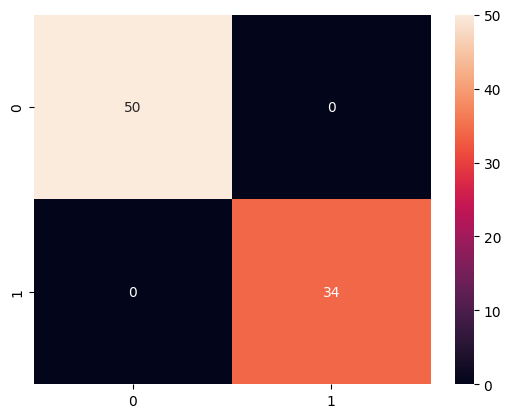

In [78]:
sns.heatmap(cm, annot =True)
plt.show()